## K-Means Clustering

## Que: Perform clustering (K-Means clustering) for the airlines data to obtain optimum number of clusters. 

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


## Importing the Data

In [ ]:
airline= pd.read_csv('/content/EastWestAirlines.csv')
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


## Data Understanding

In [ ]:
airline.shape

(3999, 12)

In [ ]:
airline.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [ ]:
airline.duplicated().value_counts()

False    3999
dtype: int64

In [ ]:
airline.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

## Data Preparation

In [ ]:
airline = airline.drop(labels= 'ID#',axis= 1)
airline.head(6)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
5,16420,0,1,1,1,0,0,0,0,6942,0


In [ ]:
st_scaler = StandardScaler()
airline_scaler = st_scaler.fit_transform(airline)
airline_scaler = pd.DataFrame(airline_scaler,columns=['Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award?'])
airline_scaler

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


## Find optimum number of  cluster

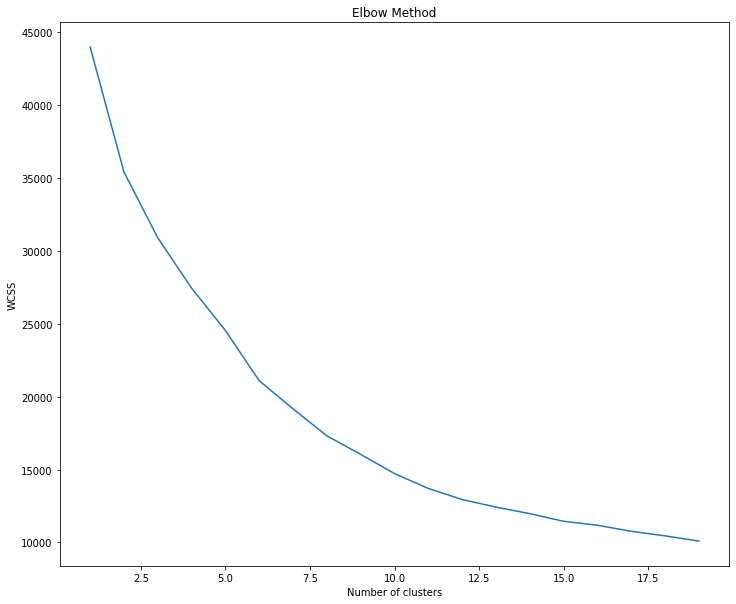

In [ ]:
wcss = []
for i in range(1,20):
  kmeans = KMeans(n_clusters =i,random_state=0)
  kmeans.fit(airline_scaler)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,10))
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Model Builing and Model Training

In [ ]:
k_model= KMeans(5, random_state=42)
k_model.fit(airline_scaler)

KMeans(n_clusters=5, random_state=42)

In [ ]:
y_km = k_model.fit_predict(airline_scaler)
y_km

array([1, 1, 1, ..., 3, 1, 1], dtype=int32)

In [ ]:
clusters = pd.DataFrame(y_km, columns=['clusters'])
clusters

,clusters
0,1
1,1
2,1
3,1
4,3
...,...
3994,1
3995,1
3996,3
3997,1


In [ ]:
airline['clusters']= clusters
airline.head(6)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
5,16420,0,1,1,1,0,0,0,0,6942,0,1


In [ ]:
airline['clusters'].value_counts()

1    2532
3    1239
0     170
2      43
4      15
Name: clusters, dtype: int64

In [ ]:
airline[airline['clusters']==0].shape

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
21,185681,2024,1,1,1,13300,16,1800,9,6896,1,0
22,20584,0,1,1,1,3450,11,3450,11,6884,0,0
42,60313,0,1,1,1,10000,26,3250,9,7829,1,0
50,108137,0,1,1,1,6368,5,6368,5,6844,0,0
65,53914,0,3,1,1,33767,45,5550,29,6826,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3907,126490,0,1,1,1,8808,15,5183,12,1566,0,0
3911,55922,2273,1,1,1,8104,19,4104,16,1552,0,0
3917,130748,0,4,1,1,65510,37,6349,7,1545,0,0
3934,76595,0,1,1,1,10577,2,9577,1,1515,0,0


In [ ]:
airline[airline['clusters']==1].shape

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
5,16420,0,1,1,1,0,0,0,0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,3974,0,1,1,1,365,3,0,0,1397,0,1
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [ ]:
airline[airline['clusters']==2].shape

(43, 12)

In [ ]:
airline[airline['clusters']==3].shape

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
6,84914,0,3,1,1,27482,25,0,0,6994,0,3
9,104860,0,3,1,1,28426,28,1150,3,6931,1,3
11,96522,0,5,1,1,61105,19,0,0,6924,1,3
15,28495,0,4,1,1,49442,15,0,0,6912,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3979,57793,0,3,1,1,20959,15,1198,3,1424,1,3
3980,28867,0,3,1,1,19169,28,0,0,1425,0,3
3985,59017,0,4,1,1,34746,25,0,0,1418,0,3
3991,39142,0,3,1,1,14981,28,0,0,1408,0,3


In [ ]:
airline[airline['clusters']==4].shape

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
106,96627,1182,1,1,3,49059,26,2300,9,6738,1,4
384,28193,0,5,1,4,103456,32,0,0,6980,1,4
850,25629,0,4,1,5,107308,36,600,2,5966,1,4
904,15835,0,2,1,5,112171,16,0,0,5825,1,4
1036,154664,0,4,1,3,73881,33,0,0,5769,0,4
1244,166465,0,4,1,4,98717,30,0,0,5531,0,4
1300,737514,0,3,1,4,43993,40,2150,7,5030,0,4
1878,128302,0,5,1,4,132263,32,400,2,4103,1,4
1917,82981,0,5,1,3,105325,44,1000,2,3964,1,4
1946,126873,0,4,1,5,95598,32,500,1,3880,1,4


In [ ]:
airline.groupby(by='clusters').agg(['mean']).reset_index()

,clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,188455.641176,961.558824,2.194118,1.000000,1.000000,30945.770588,26.111765,5277.958824,15.258824,4678.300000,0.800000
1,1,44293.077409,98.530806,1.237362,1.000000,1.000395,4722.390205,6.885861,196.838468,0.614929,3699.326619,0.202607
2,2,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
3,3,117119.906376,130.094431,3.736077,1.000000,1.001614,39793.209040,18.843422,332.092010,0.987086,4897.692494,0.651332
4,4,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


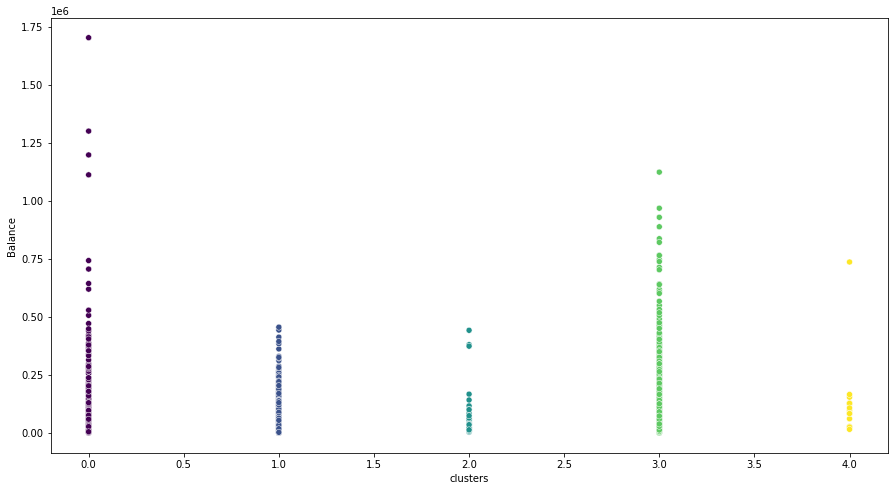

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(airline['clusters'],airline['Balance'],c=k_model.labels_) 
plt.show()